In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importamos el Csv

In [2]:
dataset = pd.read_csv('datasets/pokemon_alopez247.csv')
dt = dataset

FileNotFoundError: [Errno 2] No such file or directory: '../input/pokemon/pokemon_alopez247.csv'

# Conocemos nuestros datos

In [ ]:
dt.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [ ]:
dt.shape

(721, 23)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [ ]:
dt.isnull().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [ ]:
df = dt.dropna()

In [ ]:
df.isna().sum()

Number              0
Name                0
Type_1              0
Type_2              0
Total               0
HP                  0
Attack              0
Defense             0
Sp_Atk              0
Sp_Def              0
Speed               0
Generation          0
isLegendary         0
Color               0
hasGender           0
Pr_Male             0
Egg_Group_1         0
Egg_Group_2         0
hasMegaEvolution    0
Height_m            0
Weight_kg           0
Catch_Rate          0
Body_Style          0
dtype: int64

In [ ]:
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,361.333333,422.039216,70.058824,76.431373,75.431373,69.284314,70.303922,60.529412,3.352941,0.585784,1.135392,53.834314,94.529412
std,203.660625,93.098789,20.885271,27.981787,24.520555,24.211272,21.502378,24.781303,1.644957,0.177633,0.772315,65.489924,66.040897
min,1.000000,210.000000,30.000000,20.000000,30.000000,20.000000,25.000000,10.000000,1.000000,0.000000,0.200000,0.500000,25.000000
25%,190.250000,340.000000,55.000000,55.000000,55.500000,54.250000,55.000000,42.500000,2.000000,0.500000,0.610000,9.750000,45.000000
50%,360.000000,430.500000,70.000000,75.000000,76.500000,65.000000,70.000000,59.000000,3.000000,0.500000,0.990000,29.000000,67.500000
75%,546.750000,493.000000,84.750000,92.000000,90.000000,85.000000,85.000000,80.000000,5.000000,0.500000,1.400000,78.225000,120.000000
max,709.000000,600.000000,130.000000,140.000000,133.000000,125.000000,123.000000,116.000000,6.000000,1.000000,6.500000,310.000000,255.000000


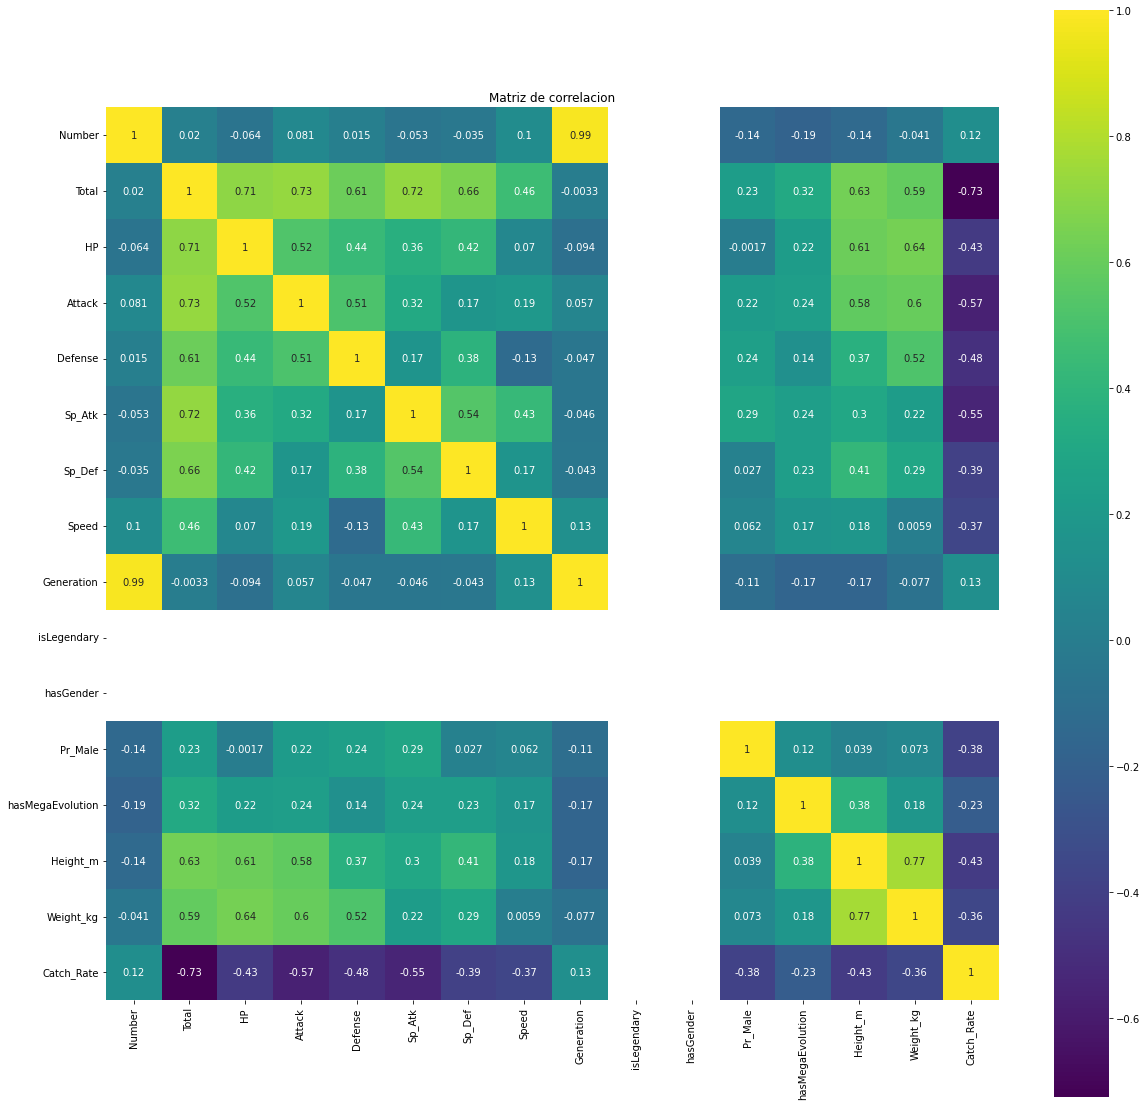

In [ ]:
cor = df.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(cor, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


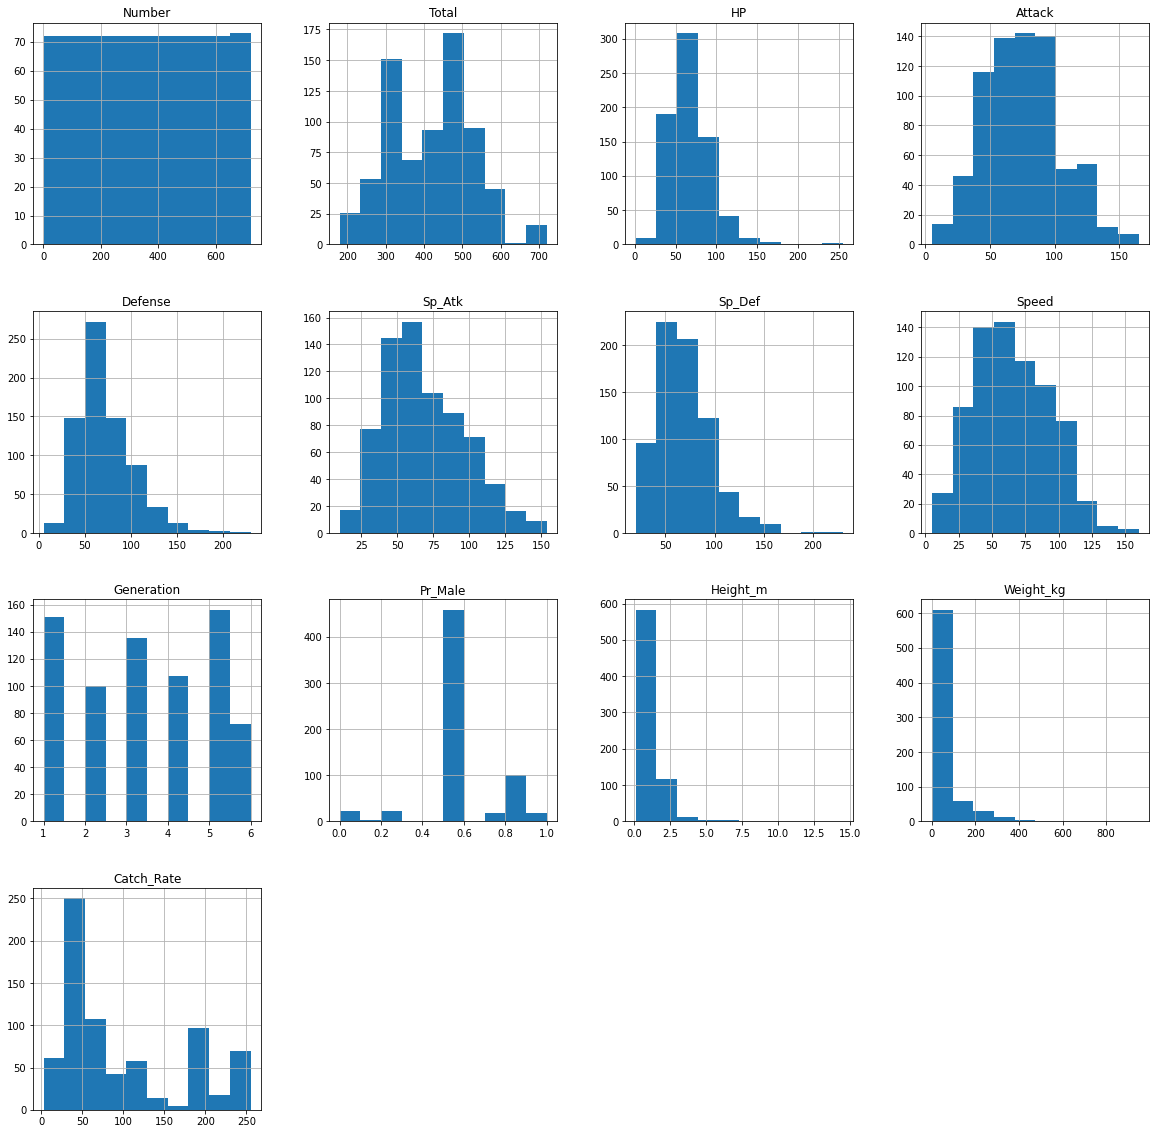

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dt.hist(ax = ax)
plt.show()

# Preprocesamiento

In [ ]:
de = df.drop(columns = ['Number', 'Name', 'Type_2', 'Color', 'Egg_Group_2'], axis=1)

In [ ]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
de['Type_1'] = encoder.fit_transform(de['Type_1'])
de['isLegendary'] = encoder.fit_transform(de['isLegendary'])
de['hasGender'] = encoder.fit_transform(de['hasGender'])
de['Egg_Group_1'] = encoder.fit_transform(de['Egg_Group_1'])
de['hasMegaEvolution'] = encoder.fit_transform(de['hasMegaEvolution'])
de['Body_Style'] = encoder.fit_transform(de['Body_Style'])

In [ ]:
de.shape

(102, 18)

In [ ]:
array = de.values
X = array[:, 0:17]
Y = array[:, 17]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler(feature_range=(0,1))
rescalerX = scaler.fit_transform(X)

estandar = StandardScaler().fit(rescalerX)
estandarX = estandar.transform(rescalerX)

X_clas = estandarX

# Modelado

In [ ]:
 name = 'Lizz'
 print(name[0:2])

: 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split


models = []
models.append(('LoR', LogisticRegression(solver="lbfgs", max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LoR', LogisticRegression()))
models.append(('CAR', DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier(n_estimators=10000, max_features=3)))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    result =  cross_val_score(model, X_clas, Y,  cv=kfold)
    results.append(result)
    names.append(name)
    print(f"{name}: {result.mean()*100.0:,.2f} ({result.std()*100.0:,.2f})")